# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

The SAT score data file is downloaded from University of California Irvine. The file shows SAT participation rate, math and verbal score for each states in US. The participation rate distribution varies from 4% to 82% among different states. The spread for math score ranges from 439 and 603. The spread for verbal score ranges from 482 to 593 in for all states. 

The standard deviation for participation rate is 27.038, math is 35.666 and for verbal is 32.915.

There are 16 states with less than 10% participation rate.Majority of states fall around mean for Math score. The data frequency appears to be evenly distributed for verbal score.

![](http://localhost:8888/notebooks/dsi/dsi-workspace/project-01_sk/assets/DescribeSATData.png)

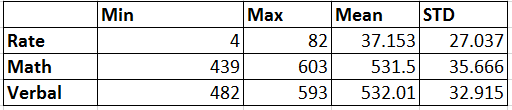

In [58]:
from IPython.display import Image
Image(filename='../assets/DescribeSATData.png') 

##### 2. Does the data look complete? Are there any obvious issues with the observations?

Due to lack of details given behind this data files the analysis has certain assumptions. e.g. we do not know how old is this data or the meaning of each columns as well as the how they are calculated and any constraints applied during calculation. 

Besides there are no missing values for the given data. There is no sign of data redundancy for given states. Although how relevant this data is not known.

##### 3. Create a data dictionary for the dataset.

![](http://localhost:8888/notebooks/dsi/dsi-workspace/project-01_sk/assets/SAT_DataDictionary.png)

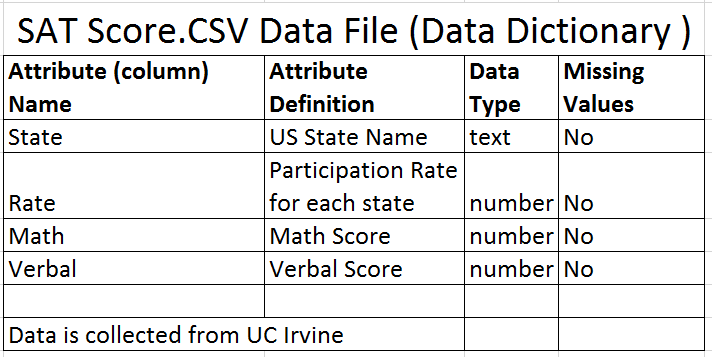

In [57]:
from IPython.display import Image
Image(filename='../assets/SAT_DataDictionary.png') 

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [22]:
import csv
# opening a csv file
file = "../assets/sat_scores.csv"
sat_data = []
with open(file,'r') as f:
    reader = csv.reader(f)
    for row in reader:
        sat_data.append(row)

##### 5. Print the data

In [23]:
sat_data

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [24]:
# extract the header row amd data
labels = sat_data[0]
sat_data = sat_data[1:]


In [25]:
labels

['State', 'Rate', 'Verbal', 'Math']

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [26]:
# first split the row on commas and then get unique values for state to create stat names
# create a list of state names split on commas
state_names = []
for row in sat_data:
    state_names.append(row[0])

In [27]:
state_names

['CT',
 'NJ',
 'MA',
 'NY',
 'NH',
 'RI',
 'PA',
 'VT',
 'ME',
 'VA',
 'DE',
 'MD',
 'NC',
 'GA',
 'IN',
 'SC',
 'DC',
 'OR',
 'FL',
 'WA',
 'TX',
 'HI',
 'AK',
 'CA',
 'AZ',
 'NV',
 'CO',
 'OH',
 'MT',
 'WV',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS',
 'All']

##### 8. Print the types of each column

In [28]:
for row in sat_data[0]:
    print type(row[0])

<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [29]:
# looking at the labels: Rate, verbal, math should be of numeric type and should be converted to float
converted_sat_data = []
for row in sat_data:
    new_row = []
    for i, col in enumerate(row):
        # do not change data type for state
        if i == 0:
            new_row.append(col)
        # change for all other three columns
        else:
            new_row.append(float(col))
    converted_sat_data.append(new_row)

In [30]:
converted_sat_data

[['CT', 82.0, 509.0, 510.0],
 ['NJ', 81.0, 499.0, 513.0],
 ['MA', 79.0, 511.0, 515.0],
 ['NY', 77.0, 495.0, 505.0],
 ['NH', 72.0, 520.0, 516.0],
 ['RI', 71.0, 501.0, 499.0],
 ['PA', 71.0, 500.0, 499.0],
 ['VT', 69.0, 511.0, 506.0],
 ['ME', 69.0, 506.0, 500.0],
 ['VA', 68.0, 510.0, 501.0],
 ['DE', 67.0, 501.0, 499.0],
 ['MD', 65.0, 508.0, 510.0],
 ['NC', 65.0, 493.0, 499.0],
 ['GA', 63.0, 491.0, 489.0],
 ['IN', 60.0, 499.0, 501.0],
 ['SC', 57.0, 486.0, 488.0],
 ['DC', 56.0, 482.0, 474.0],
 ['OR', 55.0, 526.0, 526.0],
 ['FL', 54.0, 498.0, 499.0],
 ['WA', 53.0, 527.0, 527.0],
 ['TX', 53.0, 493.0, 499.0],
 ['HI', 52.0, 485.0, 515.0],
 ['AK', 51.0, 514.0, 510.0],
 ['CA', 51.0, 498.0, 517.0],
 ['AZ', 34.0, 523.0, 525.0],
 ['NV', 33.0, 509.0, 515.0],
 ['CO', 31.0, 539.0, 542.0],
 ['OH', 26.0, 534.0, 439.0],
 ['MT', 23.0, 539.0, 539.0],
 ['WV', 18.0, 527.0, 512.0],
 ['ID', 17.0, 543.0, 542.0],
 ['TN', 13.0, 562.0, 553.0],
 ['NM', 13.0, 551.0, 542.0],
 ['IL', 12.0, 576.0, 589.0],
 ['KY', 12.0, 

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [31]:
state_dict = {}
for row in converted_sat_data:
    state_score = []
    for i, col in enumerate(row):
        if i > 0:
            state_score.append(col)
    state_dict[row[0]] = state_score
state_dict

{'AK': [51.0, 514.0, 510.0],
 'AL': [9.0, 559.0, 554.0],
 'AR': [6.0, 562.0, 550.0],
 'AZ': [34.0, 523.0, 525.0],
 'All': [45.0, 506.0, 514.0],
 'CA': [51.0, 498.0, 517.0],
 'CO': [31.0, 539.0, 542.0],
 'CT': [82.0, 509.0, 510.0],
 'DC': [56.0, 482.0, 474.0],
 'DE': [67.0, 501.0, 499.0],
 'FL': [54.0, 498.0, 499.0],
 'GA': [63.0, 491.0, 489.0],
 'HI': [52.0, 485.0, 515.0],
 'IA': [5.0, 593.0, 603.0],
 'ID': [17.0, 543.0, 542.0],
 'IL': [12.0, 576.0, 589.0],
 'IN': [60.0, 499.0, 501.0],
 'KS': [9.0, 577.0, 580.0],
 'KY': [12.0, 550.0, 550.0],
 'LA': [7.0, 564.0, 562.0],
 'MA': [79.0, 511.0, 515.0],
 'MD': [65.0, 508.0, 510.0],
 'ME': [69.0, 506.0, 500.0],
 'MI': [11.0, 561.0, 572.0],
 'MN': [9.0, 580.0, 589.0],
 'MO': [8.0, 577.0, 577.0],
 'MS': [4.0, 566.0, 551.0],
 'MT': [23.0, 539.0, 539.0],
 'NC': [65.0, 493.0, 499.0],
 'ND': [4.0, 592.0, 599.0],
 'NE': [8.0, 562.0, 568.0],
 'NH': [72.0, 520.0, 516.0],
 'NJ': [81.0, 499.0, 513.0],
 'NM': [13.0, 551.0, 542.0],
 'NV': [33.0, 509.0, 51

##### 11. Create a dictionary with the values for each of the numeric columns

In [32]:
sat_ratings = {}
for label in labels[1:]:
    sat_ratings[label] = []

for row in converted_sat_data:
    for i, cell in enumerate(row):
        if i > 0:
            sat_ratings[labels[i]].append(cell)
print sat_ratings

{'Rate': [82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, 4.0, 4.0, 45.0], 'Math': [510.0, 513.0, 515.0, 505.0, 516.0, 499.0, 499.0, 506.0, 500.0, 501.0, 499.0, 510.0, 499.0, 489.0, 501.0, 488.0, 474.0, 526.0, 499.0, 527.0, 499.0, 515.0, 510.0, 517.0, 525.0, 515.0, 542.0, 439.0, 539.0, 512.0, 542.0, 553.0, 542.0, 589.0, 550.0, 545.0, 572.0, 589.0, 580.0, 554.0, 568.0, 561.0, 577.0, 562.0, 596.0, 550.0, 570.0, 603.0, 582.0, 599.0, 551.0, 514.0], 'Verbal': [509.0, 499.0, 511.0, 495.0, 520.0, 501.0, 500.0, 511.0, 506.0, 510.0, 501.0, 508.0, 493.0, 491.0, 499.0, 486.0, 482.0, 526.0, 498.0, 527.0, 493.0, 485.0, 514.0, 498.0, 523.0, 509.0, 539.0, 534.0, 539.0, 527.0, 543.0, 562.0, 551.0, 576.0, 550.0, 547.0, 561.0, 580.0, 577.0, 559.0, 562.0, 567.0, 577.0, 564.0

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [33]:
import numpy as np
# for each key in a dictionary calculate min and max
for key in sat_ratings.keys():
    print  key,  " Min:",np.min(sat_ratings[key]), ",   Max:", np.max(sat_ratings[key])    

Rate  Min: 4.0 ,   Max: 82.0
Math  Min: 439.0 ,   Max: 603.0
Verbal  Min: 482.0 ,   Max: 593.0


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [34]:
# the function below will return standard deviation for a given dictionary 
def compute_standard_Deviation(dict):
    return [np.std(dict[rating]) for rating in dict] 
#print [np.std([rating[key] for rating in sat_ratings]]

In [35]:
# function call
compute_standard_Deviation(sat_ratings)

[27.037996494523586, 35.666996164305949, 32.915094961603266]

## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

In [36]:
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn
"numpy version: " + np.__version__

'numpy version: 1.10.4'

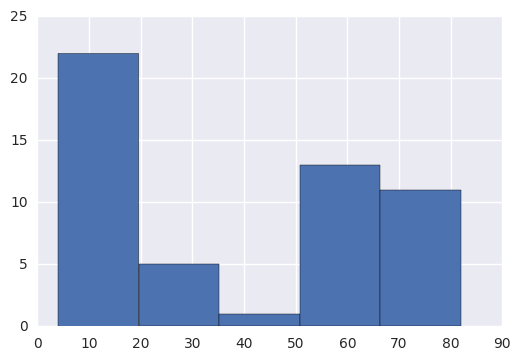

In [47]:
rate_histogram = plot.hist(sat_ratings['Rate'],bins=5)

##### 15. Plot the Math distribution

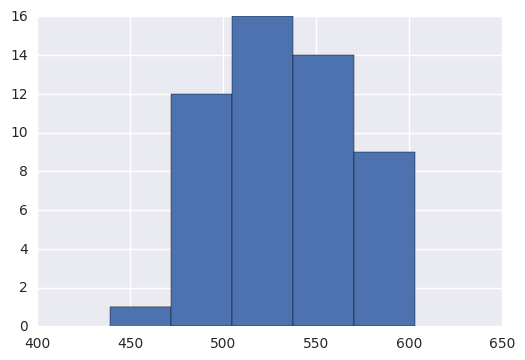

In [48]:
math_histogram = plot.hist(sat_ratings['Math'],bins=5)

##### 16. Plot the Verbal distribution

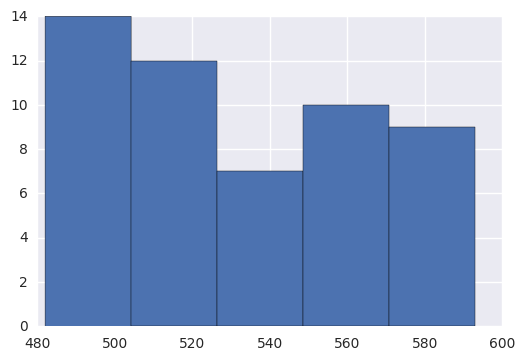

In [49]:
verbal_histogram = plot.hist(sat_ratings['Verbal'],bins=5)

##### 17. What is the typical assumption for data distribution?

1. One of the common assumption is that the sample mean is the same as real mean and that the sample actually represents all categories from population.
2. Error analysis is another one. We usually assume that the random errors follow a normal distribution. This assumption can break down when there are multiple sources of errors and they are correlated. In addition, if the errors are not truly random, then too this assumption might not be valid.
3. The data is accurate and complete.

##### 18. Does that distribution hold true for our data?

The distribution for Verbal scrore seems almost symmetrical although it might be skewed to right. 

The distribution of of math score seems almost symmetrical. 

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

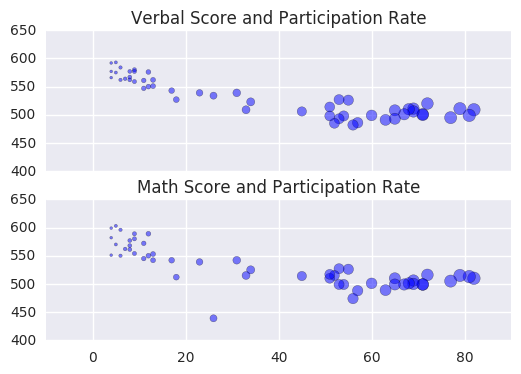

In [50]:
f, array = plot.subplots(2, sharex=True, sharey=True) 
array[0].scatter(sat_ratings['Rate'],sat_ratings['Verbal'], s=sat_ratings['Rate'], alpha=0.5) 
array[0].set_title('Verbal Score and Participation Rate') 
array[1].scatter(sat_ratings['Rate'],sat_ratings['Math'], s=sat_ratings['Rate'], alpha=0.5) 
array[1].set_title('Math Score and Participation Rate')


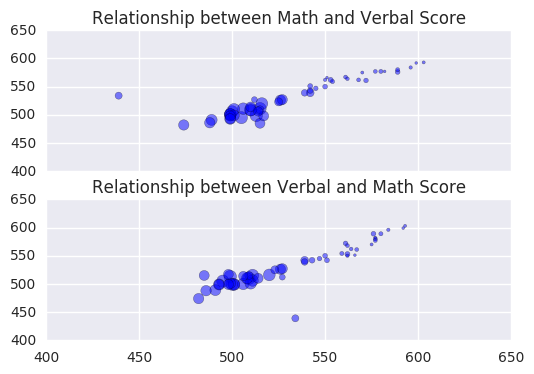

In [51]:
f, array = plot.subplots(2, sharex=True, sharey=True) 
array[0].scatter(sat_ratings['Math'],sat_ratings['Verbal'], s=sat_ratings['Rate'], alpha=0.5) 
array[0].set_title('Relationship between Math and Verbal Score')
array[1].scatter(sat_ratings['Verbal'],sat_ratings['Math'], s=sat_ratings['Rate'], alpha=0.5) 
array[1].set_title('Relationship between Verbal and Math Score')

##### 20. Are there any interesting relationships to note?

Relationship : Participation with Math and Verbal

Its interesting to note that there is a score trend going lower as participation rate increases. however slope goes down that might suggest negative relationship. For lower participation states (rate less than 20%) there seems good negative relationshipship as the slope suggest going down steep. For higher participation states (> 40%) the slope does not trend low as much and suggest not strong negative relationship. 

Suggesting that lower participation has higher math and verbal score and higher participation has lower score does not seem right. Ohio state suggest an outlier for math score.

The analysis trend are similar for both the verbal and math.

Relationshp : Math and verbal scores
As math score increases verbal score also increase and vice a versa. That suggests positive relationship between the two.



##### 21. Create box plots for each variable. 

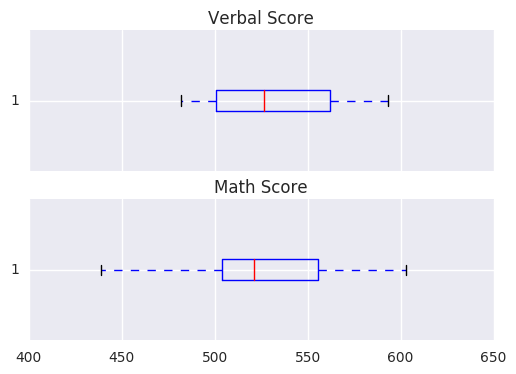

In [53]:
f, array = plot.subplots(2, sharex=True) 
array[0].boxplot  (sat_ratings['Verbal'], vert=False) 
array[0].set_title('Verbal Score') 
array[1].boxplot(sat_ratings['Math'], vert=False) 
array[1].set_title('Math Score')

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

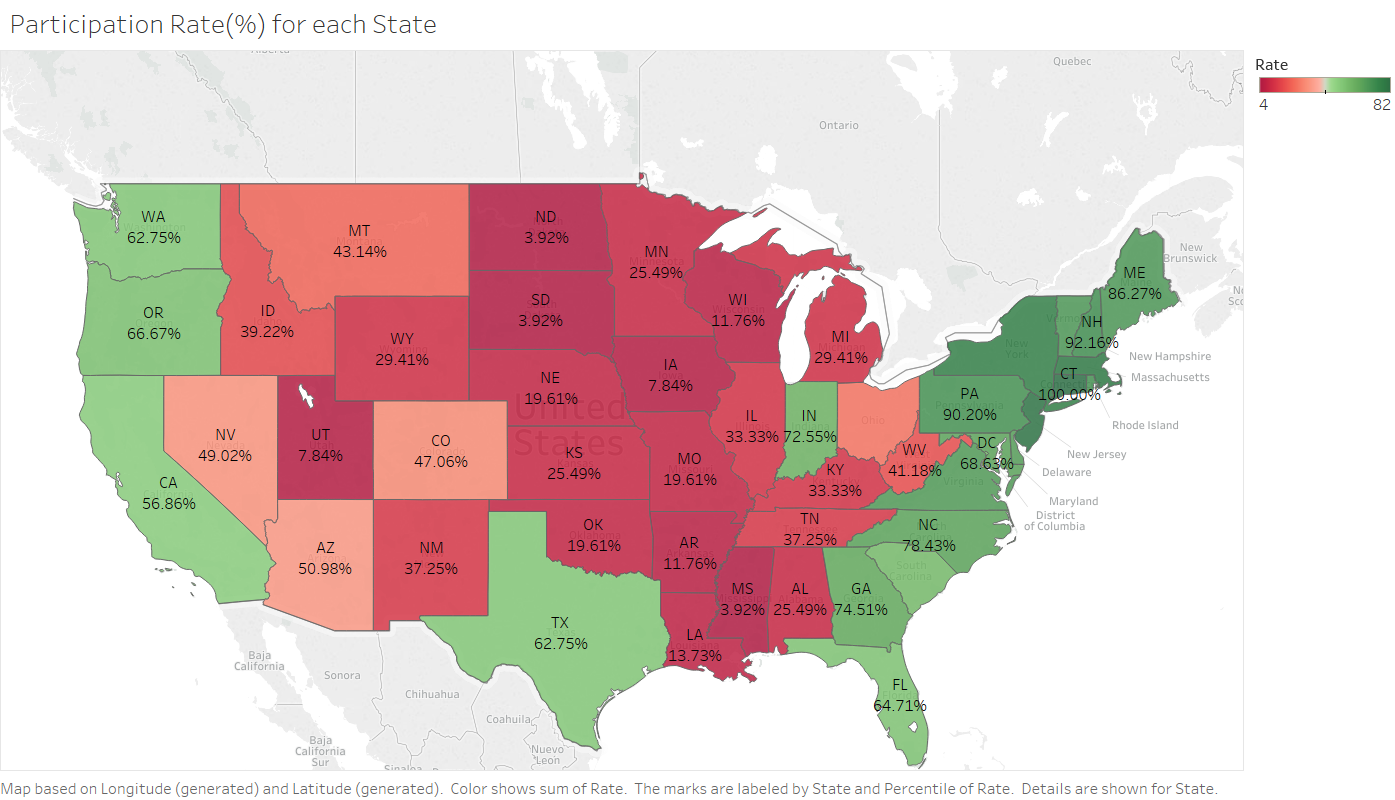

In [54]:
from IPython.display import Image
Image(filename='../assets/participationrate.png') 

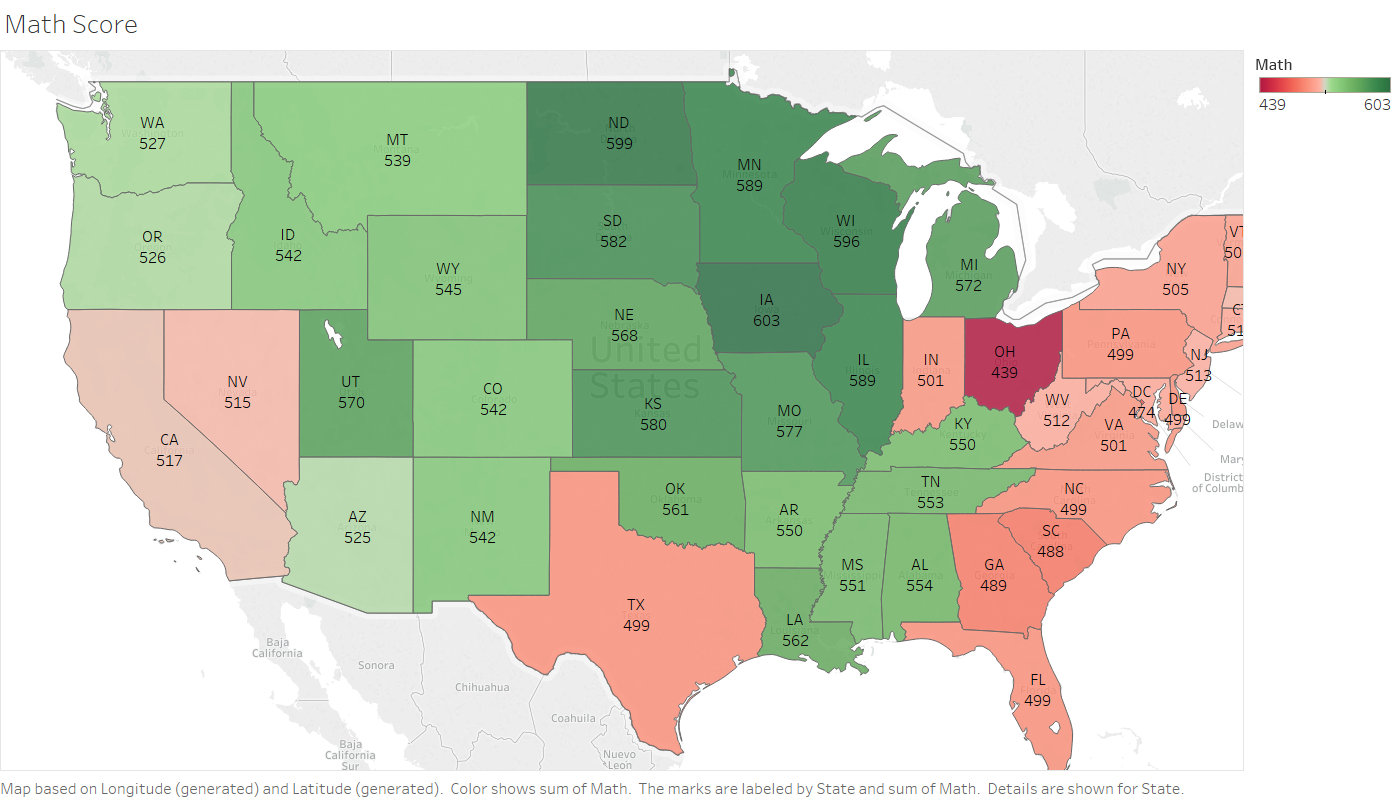

In [55]:
from IPython.display import Image
Image(filename='../assets/Mathscore.png') 

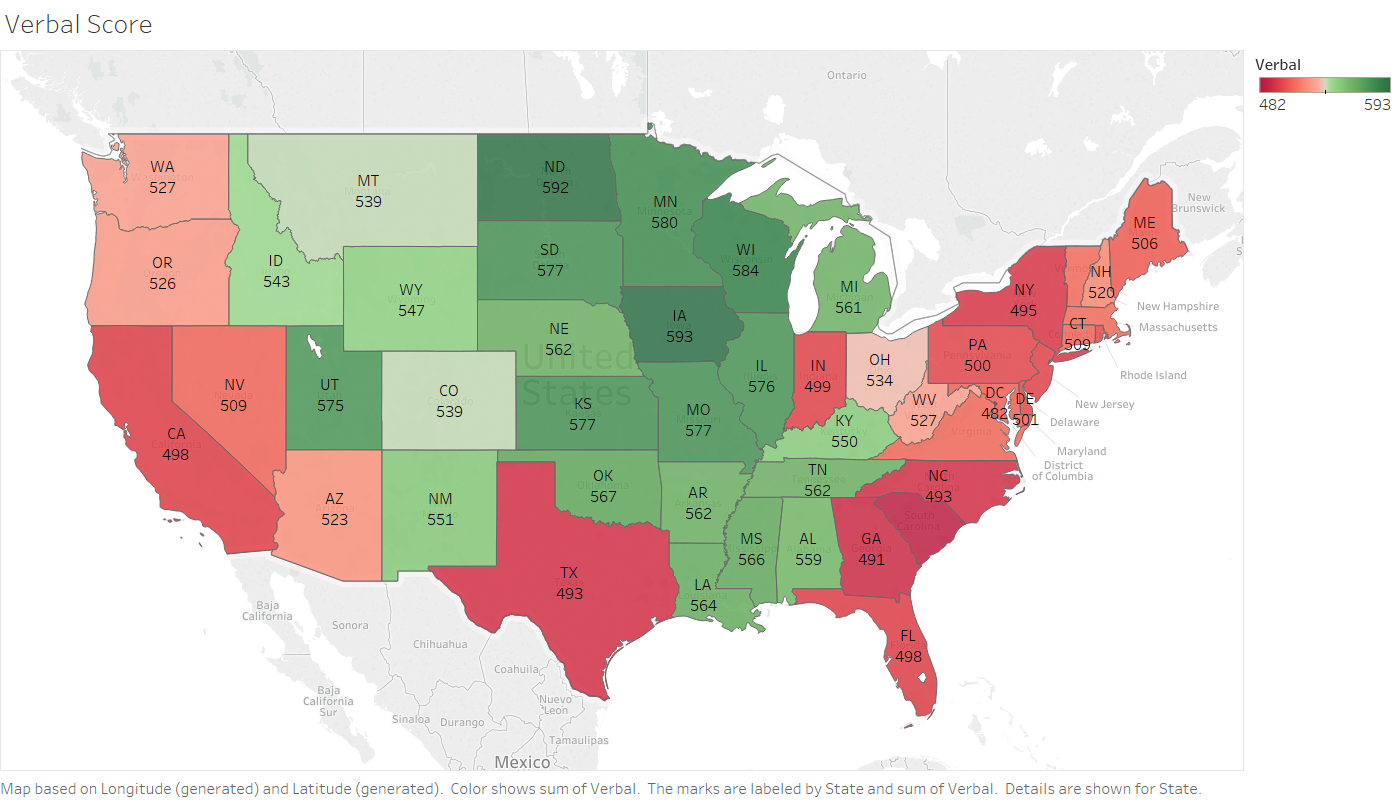

In [56]:
from IPython.display import Image
Image(filename='../assets/Verbalscore.png') 